## National Skill Development Corporation(NSDC)_ Capstone Project<br>
<br>
<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import Imputer
from matplotlib.pyplot import figure
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree, ensemble
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel("data.xlsx")

In [4]:
data.shape

(96964, 41)

In [5]:
data.head()

,NewID,Sector.ID,JobRoleLevel,JobRoleID,HostelFacilityMale,Centre.Ownership,CentreType,TG1,Assessed,employertype,...,VM1,EducationAttained,TC.State,TC.District,SSCName,Region,StateUT,District,City_type,MonthlyIncome
0,1,52,2,31,1,2.0,1.0,1.0,2,NaN,...,1,3,23,198,2.0,6.0,23.0,198.0,2.0,NaN
1,2,52,2,31,1,2.0,1.0,1.0,2,NaN,...,3,3,9,149,2.0,3.0,9.0,149.0,3.0,NaN
2,3,52,2,31,1,2.0,1.0,1.0,2,2.0,...,3,3,9,149,2.0,3.0,9.0,149.0,3.0,7000.0
3,4,52,2,31,1,2.0,1.0,1.0,2,2.0,...,2,3,9,149,2.0,3.0,9.0,149.0,3.0,6500.0
4,5,52,2,31,1,2.0,1.0,1.0,2,2.0,...,3,2,9,149,2.0,3.0,9.0,149.0,3.0,5500.0


In [6]:
data.describe()

,NewID,Sector.ID,JobRoleLevel,JobRoleID,HostelFacilityMale,Centre.Ownership,CentreType,TG1,Assessed,employertype,...,VM1,EducationAttained,TC.State,TC.District,SSCName,Region,StateUT,District,City_type,MonthlyIncome
count,96964.000000,96964.000000,96964.000000,96964.000000,96964.000000,95547.000000,95627.000000,96945.000000,96964.000000,40385.000000,...,96964.000000,96964.000000,96964.000000,96964.000000,96947.000000,96947.000000,96947.000000,96947.000000,96947.000000,40409.000000
mean,48482.500000,75.142610,1.769822,40.854812,1.093550,1.574283,1.007968,1.609562,1.920414,2.759787,...,1.774844,2.571398,18.326915,253.941731,13.487266,3.523410,18.354905,253.601390,2.599812,7141.213368
std,27991.240088,18.915724,0.420949,45.705185,0.291203,0.494454,0.088910,0.488400,0.270653,0.456472,...,0.831208,2.287970,9.028586,144.789530,10.094720,1.556186,9.008073,145.048992,0.627367,2895.111520
min,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000
25%,24241.750000,58.000000,2.000000,8.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,...,1.000000,1.000000,9.000000,149.000000,4.000000,3.000000,9.000000,149.000000,2.000000,5500.000000
50%,48482.500000,68.000000,2.000000,24.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,...,2.000000,2.000000,22.000000,244.000000,9.000000,3.000000,22.000000,244.000000,3.000000,7000.000000
75%,72723.250000,96.000000,2.000000,51.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,...,2.000000,3.000000,26.000000,374.000000,22.000000,5.000000,26.000000,374.000000,3.000000,8450.000000
max,96964.000000,108.000000,2.000000,178.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,...,4.000000,10.000000,30.000000,513.000000,33.000000,6.000000,30.000000,513.000000,3.000000,95000.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96964 entries, 0 to 96963
Data columns (total 41 columns):
NewID                         96964 non-null int64
Sector.ID                     96964 non-null int64
JobRoleLevel                  96964 non-null int64
JobRoleID                     96964 non-null int64
HostelFacilityMale            96964 non-null int64
Centre.Ownership              95547 non-null float64
CentreType                    95627 non-null float64
TG1                           96945 non-null float64
Assessed                      96964 non-null int64
employertype                  40385 non-null float64
Result.are.approved.by.ssc    96964 non-null int64
TotalPracticalMark            95028 non-null float64
TotalTheoryMark               95028 non-null float64
TotalPercentage               95028 non-null float64
Certified                     96964 non-null int64
placed                        96964 non-null int64
Gender                        96964 non-null int64
TrainingTy

In [8]:
data.isnull().sum()

NewID                             0
Sector.ID                         0
JobRoleLevel                      0
JobRoleID                         0
HostelFacilityMale                0
Centre.Ownership               1417
CentreType                     1337
TG1                              19
Assessed                          0
employertype                  56579
Result.are.approved.by.ssc        0
TotalPracticalMark             1936
TotalTheoryMark                1936
TotalPercentage                1936
Certified                         0
placed                            0
Gender                            0
TrainingType                      0
subsectorid                       0
PartnerID                         0
CentreID                          0
TrainerID                         0
BatchID                           0
YearofBirth                       4
Grade                         14071
Batch.Start.Date                 17
Batch.End.Date                   17
CentreSqftArea              

#### There are many missing values which need to be treated

## Data Exploration

### Checking the Dependent vaiables

1= Not placed<br>
2= Placed

In [9]:
data.placed.value_counts()

1    56579
2    40385
Name: placed, dtype: int64

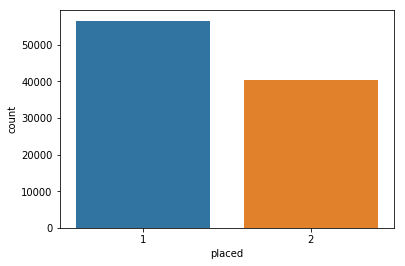

In [10]:
sns.countplot(x='placed', data=data)
plt.show()

In [11]:
count_of_not_placed=len(data[data['placed']==1])
count_of_placed=len(data[data['placed']==2])
pct_of_placed=count_of_not_placed/(count_of_placed+count_of_not_placed)
print("percentage of students not placed :",pct_of_placed*100)
pct_of_not_placed=count_of_placed/(count_of_placed+count_of_not_placed)
print("percentage of students placed :",pct_of_not_placed*100)

percentage of students not placed : 58.35052184315829
percentage of students placed : 41.64947815684171


It seems that our data is not imbalanced.

In [11]:
data.groupby('placed').mean()

,NewID,Sector.ID,JobRoleLevel,JobRoleID,HostelFacilityMale,Centre.Ownership,CentreType,TG1,Assessed,employertype,...,VM1,EducationAttained,TC.State,TC.District,SSCName,Region,StateUT,District,City_type,MonthlyIncome
placed,,,,,,,,,,,,,,,,,,,,,
1,50147.604553,76.592517,1.772477,41.507397,1.093250,1.543291,1.009990,1.640647,1.869315,NaN,...,1.772159,2.55692,18.260291,252.364163,13.870174,3.475958,18.358878,252.629331,2.587664,7424.202342
2,46149.704395,73.111304,1.766101,39.940547,1.093971,1.617615,1.005142,1.566027,1.992002,2.759787,...,1.778606,2.59168,18.420255,256.151888,12.950841,3.589886,18.349340,254.963174,2.616831,7101.690527


### Observations

    1. We can see monthly salary is both present for placed and not placed. Need to assess it further.
    2. We can exclude the Monthly salary when working for placement.
    2. Most of the variables are encorded hence the mean is not actual exept for the few continious variables.

### EDA with Categorical Variables with Predictor<br>
<br>
<br>

#### Grades


Text(0.5,1,'Placements as per grades obtained')

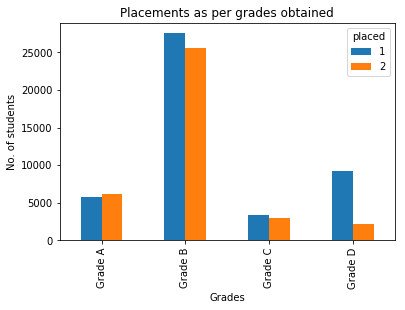

In [12]:
pd.crosstab(data.Grade,data.placed).plot(kind='bar')
plt.xlabel('Grades')
plt.ylabel('No. of students')
plt.title('Placements as per grades obtained')

Observations:<br>
        1. Group B has max number of placed as well as unplaced.
        2. It seems there are few datapoints with '00:00:00'. 

### Certified

Text(0.5,1,'No. of Placements Vs No. of students certified')

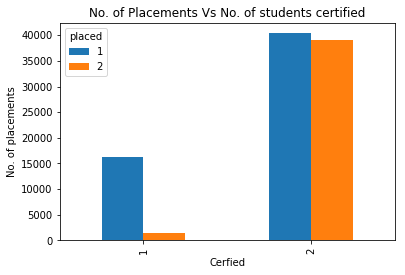

In [13]:
pd.crosstab(data.Certified,data.placed).plot(kind='bar')
plt.xlabel('Cerfied')
plt.ylabel('No. of placements')
plt.title('No. of Placements Vs No. of students certified')

Observations:<br>
            1.No. of not certified have also been placed, can it be an outlier?

### Results are approved by SSC

Text(0.5,1,'Results Vs Placed')

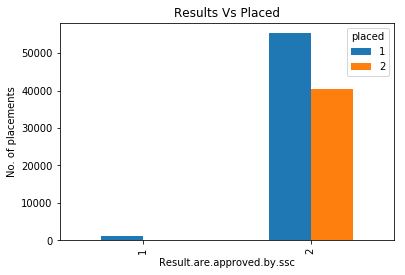

In [14]:
pd.crosstab(data['Result.are.approved.by.ssc'],data.placed).plot(kind='bar')
plt.ylabel('No. of placements')
plt.title('Results Vs Placed')

### Gender

Text(0.5,1,'Gender Vs Placements')

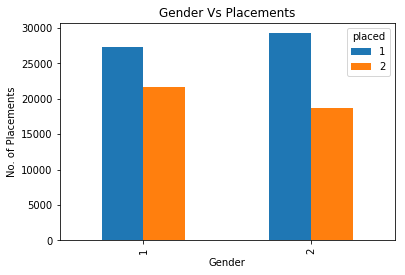

In [15]:
pd.crosstab(data.Gender,data.placed).plot(kind='bar')
plt.ylabel('No. of Placements')
plt.title('Gender Vs Placements')

### Education Attained

Text(0.5,1,'Education Attained Vs Placed')

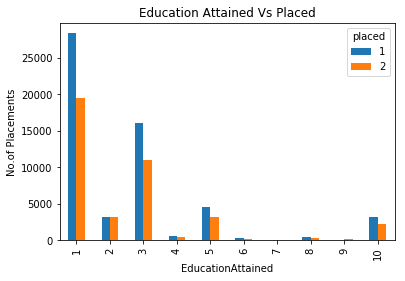

In [16]:
pd.crosstab(data.EducationAttained,data.placed).plot(kind='bar')
plt.ylabel('No.of Placements')
plt.title('Education Attained Vs Placed')

Level 1 and 3 has the max placements as well as no placements out of the lot

### Training Centre State wise placements

Text(0.5,1,'Statewise Traning Centre Vs Placements')

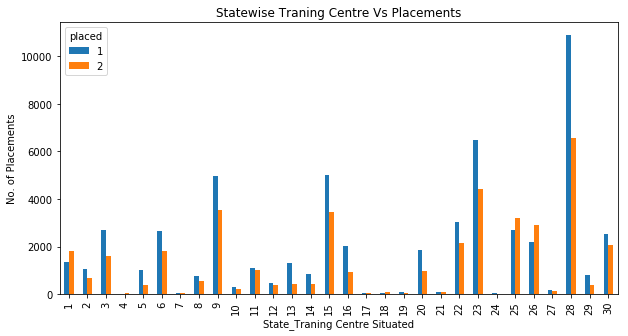

In [17]:
pd.crosstab(data['TC.State'],data.placed).plot(kind='bar',figsize=(10,5))
plt.xlabel('State_Traning Centre Situated')
plt.ylabel('No. of Placements')
plt.title('Statewise Traning Centre Vs Placements')

Observations:
    1. State 28, has max unplaced as placed students
    2. State 1, 25, 26 has more placed students than unplaced students whereas rest all states has more unplaced students 
    than unplaced students

### State.UT

Text(0.5,1,'State and Placements')

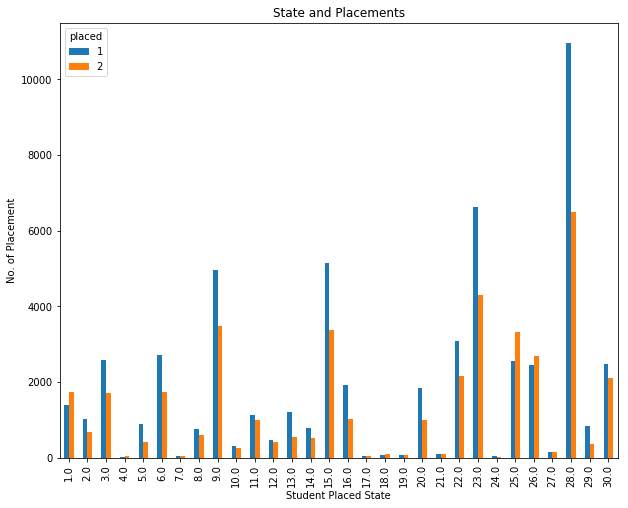

In [18]:
pd.crosstab(data.StateUT, data.placed).plot(kind='bar',figsize=(10,8))
plt.xlabel('Student Placed State')
plt.ylabel('No. of Placement')
plt.title('State and Placements')

##### Observations
    1. Statewise placements are more for 28 whereas not placed is also for 28
    2. State 1,25,26 has more students placed than unplaced

### SSC Name

Text(0.5,1,'SSC Name Vs Placements')

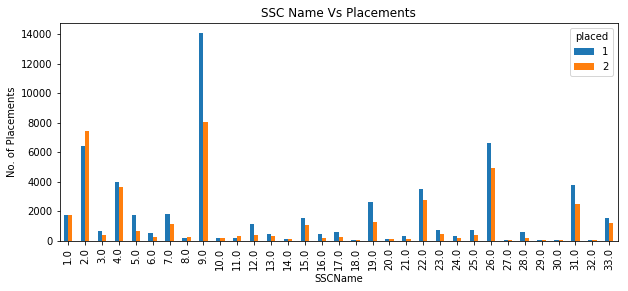

In [19]:
pd.crosstab(data.SSCName, data.placed).plot(kind='bar', figsize=(10,4))
plt.ylabel('No. of Placements')
plt.title('SSC Name Vs Placements')

#### Observations:
    1. SSC_Name 2 has more students placed than not placed.
    2. SSC_Name 9 has max placements but students with no placements are also maximum.

### Year of Birth

Text(0.5,1,'Year of Birth Vs Placements')

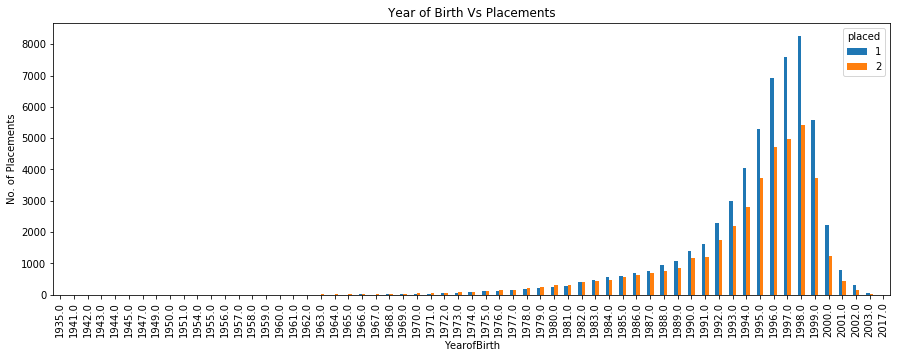

In [20]:
pd.crosstab(data.YearofBirth,data.placed).plot(kind='bar',figsize=(15,5))
plt.ylabel('No. of Placements')
plt.title('Year of Birth Vs Placements')

### Observation:<br>
    1. It seems that the data is left skewed.
    2. We can do a feature engineering with and create an age column to see the placements.
    3. Year of birth =2017 should be an outlier

<br>





# Missing Value Treatement

Imputing the missing values with mode, since categorical variables are better be used with mode

### Viewing my null columns

In [21]:
null_column=data.columns[data.isnull().any()]
data[null_column].isnull().sum()

Centre.Ownership       1417
CentreType             1337
TG1                      19
employertype          56579
TotalPracticalMark     1936
TotalTheoryMark        1936
TotalPercentage        1936
YearofBirth               4
Grade                 14071
Batch.Start.Date         17
Batch.End.Date           17
CentreSqftArea        31500
SSCName                  17
Region                   17
StateUT                  17
District                 17
City_type                17
MonthlyIncome         56555
dtype: int64

In [22]:
print(data[data['Centre.Ownership'].isnull()][null_column])

       Centre.Ownership  CentreType  TG1  employertype  TotalPracticalMark  \
43                  NaN         NaN  1.0           3.0              204.00   
83                  NaN         NaN  1.0           3.0              201.00   
132                 NaN         NaN  1.0           2.0              193.00   
226                 NaN         NaN  1.0           3.0              173.00   
292                 NaN         NaN  1.0           NaN              195.00   
378                 NaN         NaN  1.0           NaN              192.00   
399                 NaN         NaN  1.0           NaN                 NaN   
476                 NaN         NaN  1.0           2.0              191.00   
477                 NaN         NaN  1.0           2.0              185.00   
531                 NaN         NaN  1.0           NaN                0.00   
563                 NaN         NaN  1.0           NaN                0.00   
618                 NaN         NaN  1.0           2.0          

In [23]:
# All null columns
print(data[data.isnull().any(axis=1)][null_column].head())

   Centre.Ownership  CentreType  TG1  employertype  TotalPracticalMark  \
0               2.0         1.0  1.0           NaN               207.0   
1               2.0         1.0  1.0           NaN               156.0   
2               2.0         1.0  1.0           2.0               180.0   
3               2.0         1.0  1.0           2.0               226.0   
4               2.0         1.0  1.0           2.0               180.0   

   TotalTheoryMark  TotalPercentage  YearofBirth    Grade  \
0             82.0            82.57       1986.0      NaN   
1             83.0            68.29       2000.0  Grade D   
2             76.0            73.14       2001.0  Grade B   
3             97.0            92.29       1997.0  Grade A   
4             79.0            74.00       1996.0  Grade B   

      Batch.Start.Date       Batch.End.Date CentreSqftArea  SSCName  Region  \
0  2017-01-04 00:00:00  2017-04-27 00:00:00            NaN      2.0     6.0   
1  2017-01-07 00:00:00  2017-0

### Lets check the missing values again with percentage

In [24]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','percent'])

In [25]:
missing_data.head()

,Total,percent
employertype,56579,0.583505
MonthlyIncome,56555,0.583258
CentreSqftArea,31500,0.324863
Grade,14071,0.145116
TotalTheoryMark,1936,0.019966


,Total,percent
employertype,56579,0.583505
MonthlyIncome,56555,0.583258
CentreSqftArea,31500,0.324863
Grade,14071,0.145116
TotalTheoryMark,1936,0.019966
TotalPracticalMark,1936,0.019966
TotalPercentage,1936,0.019966
Centre.Ownership,1417,0.014614
CentreType,1337,0.013789
TG1,19,0.000196


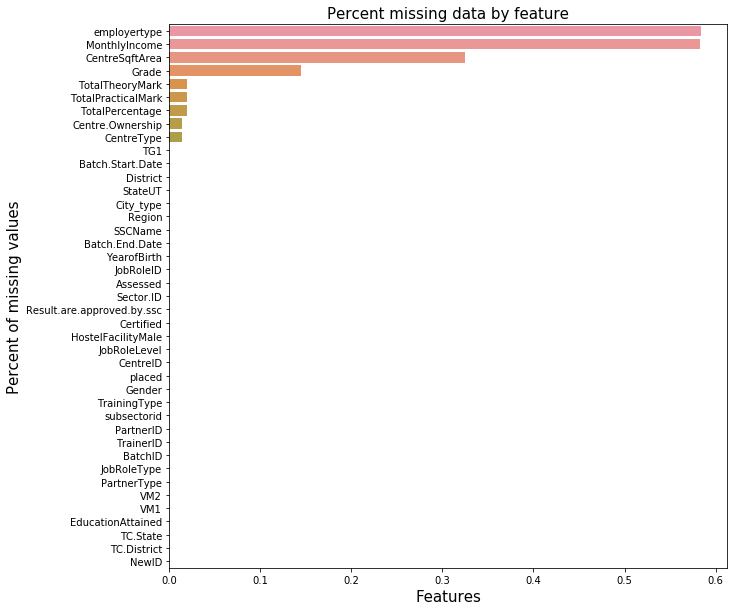

In [26]:
f,ax=plt.subplots(figsize=(10,10))
sns.barplot(y=missing_data.index, x=missing_data.percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head(10)

### CentreOwnership

In [27]:
data['Centre.Ownership'].value_counts()

2.0    54871
1.0    40676
Name: Centre.Ownership, dtype: int64

In [28]:
print("The no. of missing values are:",data['Centre.Ownership'].isnull().sum())

The no. of missing values are: 1417


In [29]:
data['Centre.Ownership'].mode()

0    2.0
dtype: float64

In [30]:
data['Centre.Ownership'].fillna(2, inplace= True)

### CentreType

In [31]:
data.CentreType.value_counts()

1.0    94865
2.0      762
Name: CentreType, dtype: int64

In [32]:
data.CentreType.mode()

0    1.0
dtype: float64

In [33]:
data.CentreType.fillna(1, inplace=True)

### TG1

In [34]:
data.TG1.value_counts()

2.0    59042
1.0    37877
3.0       26
Name: TG1, dtype: int64

In [35]:
data.TG1.value_counts(normalize=True)

2.0    0.609026
1.0    0.390706
3.0    0.000268
Name: TG1, dtype: float64

In [36]:
data.TG1.fillna(2,inplace=True)

In [37]:
data.TG1.isna().sum()

0

### SSC Name

In [38]:
data.SSCName.value_counts().head()

9.0     22074
2.0     13838
26.0    11556
4.0      7654
22.0     6287
Name: SSCName, dtype: int64

In [39]:
print('The no. if null values are:',data.SSCName.isna().sum())

The no. if null values are: 17


In [40]:
# Imputing with mode
data.SSCName.mode()

0    9.0
dtype: float64

In [41]:
data.SSCName.fillna(9, inplace=True)

### Region

In [42]:
data.Region.value_counts()

3.0    39458
5.0    17381
6.0    15268
2.0    12552
1.0     9853
4.0     2435
Name: Region, dtype: int64

In [43]:
data.Region.isna().sum()

17

In [44]:
data.Region.mode()

0    3.0
dtype: float64

In [45]:
data.Region.fillna(3, inplace=True)

### StateUT

In [46]:
data.StateUT.value_counts().head()

28.0    17447
23.0    10918
15.0     8512
9.0      8447
25.0     5893
Name: StateUT, dtype: int64

In [47]:
data.StateUT.mode()

0    28.0
dtype: float64

In [48]:
data.StateUT.fillna(28, inplace=True)

In [49]:
data.StateUT.isna().sum()

0

### District

In [50]:
data.District.isna().sum()

17

In [51]:
data.District.value_counts().head(10)

214.0    2135
198.0    1868
324.0    1283
282.0    1255
11.0     1118
345.0    1107
178.0    1032
69.0     1028
275.0    1011
152.0     968
Name: District, dtype: int64

In [52]:
data.District.mode()

0    214.0
dtype: float64

In [53]:
data.District.fillna(214, inplace=True)

### City Type

In [54]:
data.City_type.isna().sum()

17

In [55]:
data.City_type.value_counts()

3.0    65593
2.0    23911
1.0     7443
Name: City_type, dtype: int64

In [56]:
data.City_type.mode()

0    3.0
dtype: float64

In [57]:
data.City_type.fillna(3, inplace=True)

### Year of Birth

In [58]:
data.YearofBirth.isna().sum()

4

In [59]:
data.YearofBirth.mode()

0    1998.0
dtype: float64

In [60]:
data.YearofBirth.fillna(1998, inplace=True)

In [61]:
data.YearofBirth.isna().sum()

0

### Grade

In [62]:
data.Grade.describe()

count       82893
unique          4
top       Grade B
freq        53069
Name: Grade, dtype: object

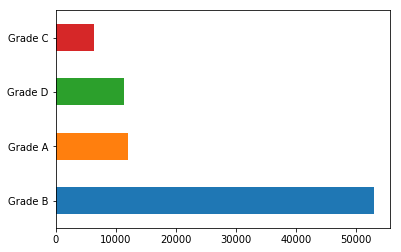

In [63]:
data['Grade'].value_counts().plot('barh')

In [64]:
data['Grade'].isna().sum()

14071

In [65]:
data.Grade.mode()

0    Grade B
dtype: object

In [66]:
data['Grade'].fillna('Grade B', inplace=True)

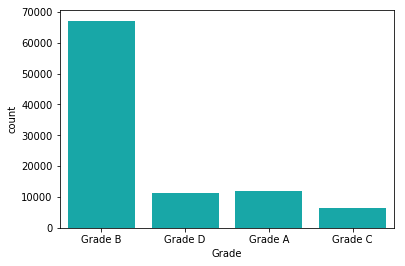

In [67]:
sns.countplot(x=data['Grade'],data=data, color='c')

In [68]:
data.Grade.isna().sum()

0

##### Masking Grade data in numerical data

In [69]:
Grades={"Grade A": 1, "Grade B": 2, "Grade C": 3, "Grade D": 4}

data['Grade']=data['Grade'].map(Grades)

In [70]:
data.Grade.value_counts()

2    67140
1    11977
4    11375
3     6472
Name: Grade, dtype: int64

#### Cross checking the remaining missing values

In [71]:
null_columns2=data.columns[data.isna().any()]
data[null_columns2].isna().sum()

employertype          56579
TotalPracticalMark     1936
TotalTheoryMark        1936
TotalPercentage        1936
Batch.Start.Date         17
Batch.End.Date           17
CentreSqftArea        31500
MonthlyIncome         56555
dtype: int64

At this point we can delete the leftover columns as above as the number of null values are more.
Also we will create a feature engineering with TotalPercentage and hence later on we can remove the rest also.

## Outlier Treatement

In [72]:
data[data['YearofBirth']==2017] # 2017 is an outlier need to be treaded may be with mode.

,NewID,Sector.ID,JobRoleLevel,JobRoleID,HostelFacilityMale,Centre.Ownership,CentreType,TG1,Assessed,employertype,...,VM1,EducationAttained,TC.State,TC.District,SSCName,Region,StateUT,District,City_type,MonthlyIncome
11256,11257,52,2,31,1,1.0,1.0,1.0,2,2.0,...,2,1,22,152,2.0,3.0,22.0,152.0,3.0,4200.0
46289,46290,96,2,5,1,1.0,1.0,2.0,2,NaN,...,2,3,28,8,9.0,3.0,22.0,152.0,3.0,NaN


In [74]:
data.YearofBirth.mode()

0    1998.0
dtype: float64

In [75]:
data.loc[data['YearofBirth']==2017, 'YearofBirth']=1998

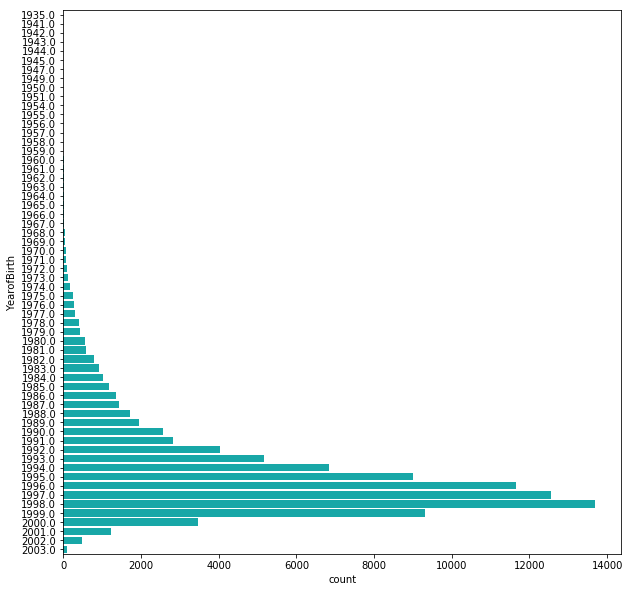

In [79]:
figure(figsize=(10,10))
sns.countplot(y=data['YearofBirth'], data=data, color="c")


##### 2017 has been removed and changed to 1998

### Feature Engineering

#### 1. Trainee Age
<br>
Creating an age column with respect to year of birth and standard year of 2017

In [80]:
data['age']=2017-data['YearofBirth']

Text(0.5,1,'Distribution of age')

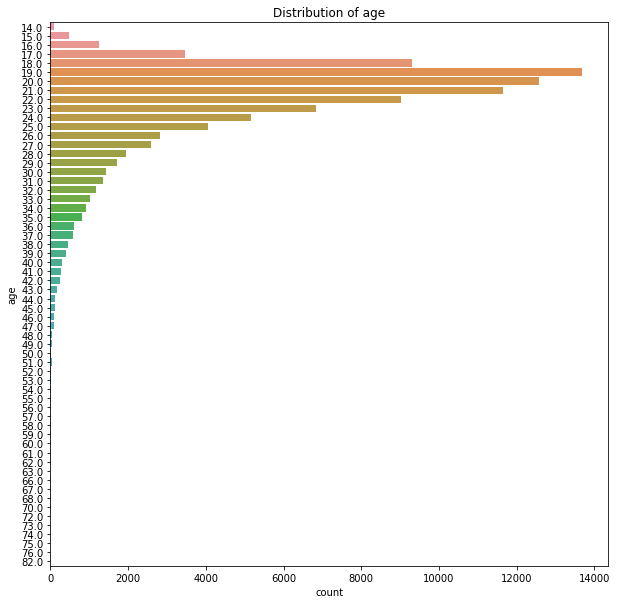

In [82]:
plt.figure(figsize=(10,10))
sns.countplot(data=data, y= data['age'])
plt.title('Distribution of age')

### TotalPercentage

Before creating any feature engineering on TotalPercentage we need to deal with missing values.

In [84]:
data.TotalPercentage.isna().sum()

1936

In [85]:
data.TotalPercentage.mean()

70.3092652691826

#####  Creating an array that contains random numbers, which are computed based  on the mean TotalPercentage value in regards to the standard deviation and is_null 

In [86]:
mean=data['TotalPercentage'].mean()
std=data['TotalPercentage'].std()
is_null=data.TotalPercentage.isnull().sum()
rand_percent=np.random.randint(mean - std, mean + std, size= is_null) # computing random nos. between mean, std and is_null
percent_slice=data['TotalPercentage'].copy()
percent_slice[np.isnan(percent_slice)]=rand_percent
data['TotalPercentage']=percent_slice


#### Totol Practical Mark

In [87]:
data.TotalPracticalMark.isna().sum()

1936

In [88]:
data.TotalPracticalMark.mean()

290.3908885802152

In [89]:
mean1=data['TotalPracticalMark'].mean()
std1=data['TotalPracticalMark'].std()
isnull1=data.TotalPracticalMark.isnull().sum()
rand_percent1=np.random.randint(mean1 - std1, mean1 + std1, size=isnull1)
percent_slice1=data['TotalPracticalMark'].copy()
percent_slice1[np.isnan(percent_slice1)]=rand_percent1
data['TotalPracticalMark']=percent_slice1


In [90]:
data.TotalPracticalMark.isna().sum()

0

#### TotalTheoryMark

In [91]:
data.TotalTheoryMark.isna().sum()

1936

In [92]:
data.TotalTheoryMark.mean()

140.58621932483223

In [93]:
mean2=data['TotalTheoryMark'].mean()
std2=data['TotalTheoryMark'].std()
isnull2=data.TotalTheoryMark.isnull().sum()
rand_percent2=np.random.randint(mean2 - std2, mean2 + std2, size=isnull2)
percent_slice2=data['TotalTheoryMark'].copy()
percent_slice2[np.isnan(percent_slice2)]=rand_percent2
data['TotalTheoryMark']=percent_slice2


In [94]:
data.TotalTheoryMark.isna().sum()

0

### Checking the remaining missing value features

In [95]:
null_columns3=data.columns[data.isna().any()]
data[null_columns3].isna().sum()


employertype        56579
Batch.Start.Date       17
Batch.End.Date         17
CentreSqftArea      31500
MonthlyIncome       56555
dtype: int64

In [96]:
data.columns

Index(['NewID', 'Sector.ID', 'JobRoleLevel', 'JobRoleID', 'HostelFacilityMale',
       'Centre.Ownership', 'CentreType', 'TG1', 'Assessed', 'employertype',
       'Result.are.approved.by.ssc', 'TotalPracticalMark', 'TotalTheoryMark',
       'TotalPercentage', 'Certified', 'placed', 'Gender', 'TrainingType',
       'subsectorid', 'PartnerID', 'CentreID', 'TrainerID', 'BatchID',
       'YearofBirth', 'Grade', 'Batch.Start.Date', 'Batch.End.Date',
       'CentreSqftArea', 'JobRoleType', 'PartnerType', 'VM2', 'VM1',
       'EducationAttained', 'TC.State', 'TC.District', 'SSCName', 'Region',
       'StateUT', 'District', 'City_type', 'MonthlyIncome', 'age'],
      dtype='object')

Removing 

In [97]:
data.drop(["NewID","JobRoleID","subsectorid","PartnerID","CentreID","TrainerID","BatchID","employertype",
           "Batch.Start.Date","CentreSqftArea","Batch.End.Date","MonthlyIncome"],axis=1, inplace=True)

In [98]:
data.head()

,Sector.ID,JobRoleLevel,HostelFacilityMale,Centre.Ownership,CentreType,TG1,Assessed,Result.are.approved.by.ssc,TotalPracticalMark,TotalTheoryMark,...,VM1,EducationAttained,TC.State,TC.District,SSCName,Region,StateUT,District,City_type,age
0,52,2,1,2.0,1.0,1.0,2,2,207.0,82.0,...,1,3,23,198,2.0,6.0,23.0,198.0,2.0,31.0
1,52,2,1,2.0,1.0,1.0,2,2,156.0,83.0,...,3,3,9,149,2.0,3.0,9.0,149.0,3.0,17.0
2,52,2,1,2.0,1.0,1.0,2,2,180.0,76.0,...,3,3,9,149,2.0,3.0,9.0,149.0,3.0,16.0
3,52,2,1,2.0,1.0,1.0,2,2,226.0,97.0,...,2,3,9,149,2.0,3.0,9.0,149.0,3.0,20.0
4,52,2,1,2.0,1.0,1.0,2,2,180.0,79.0,...,3,2,9,149,2.0,3.0,9.0,149.0,3.0,21.0


### Scatter plot

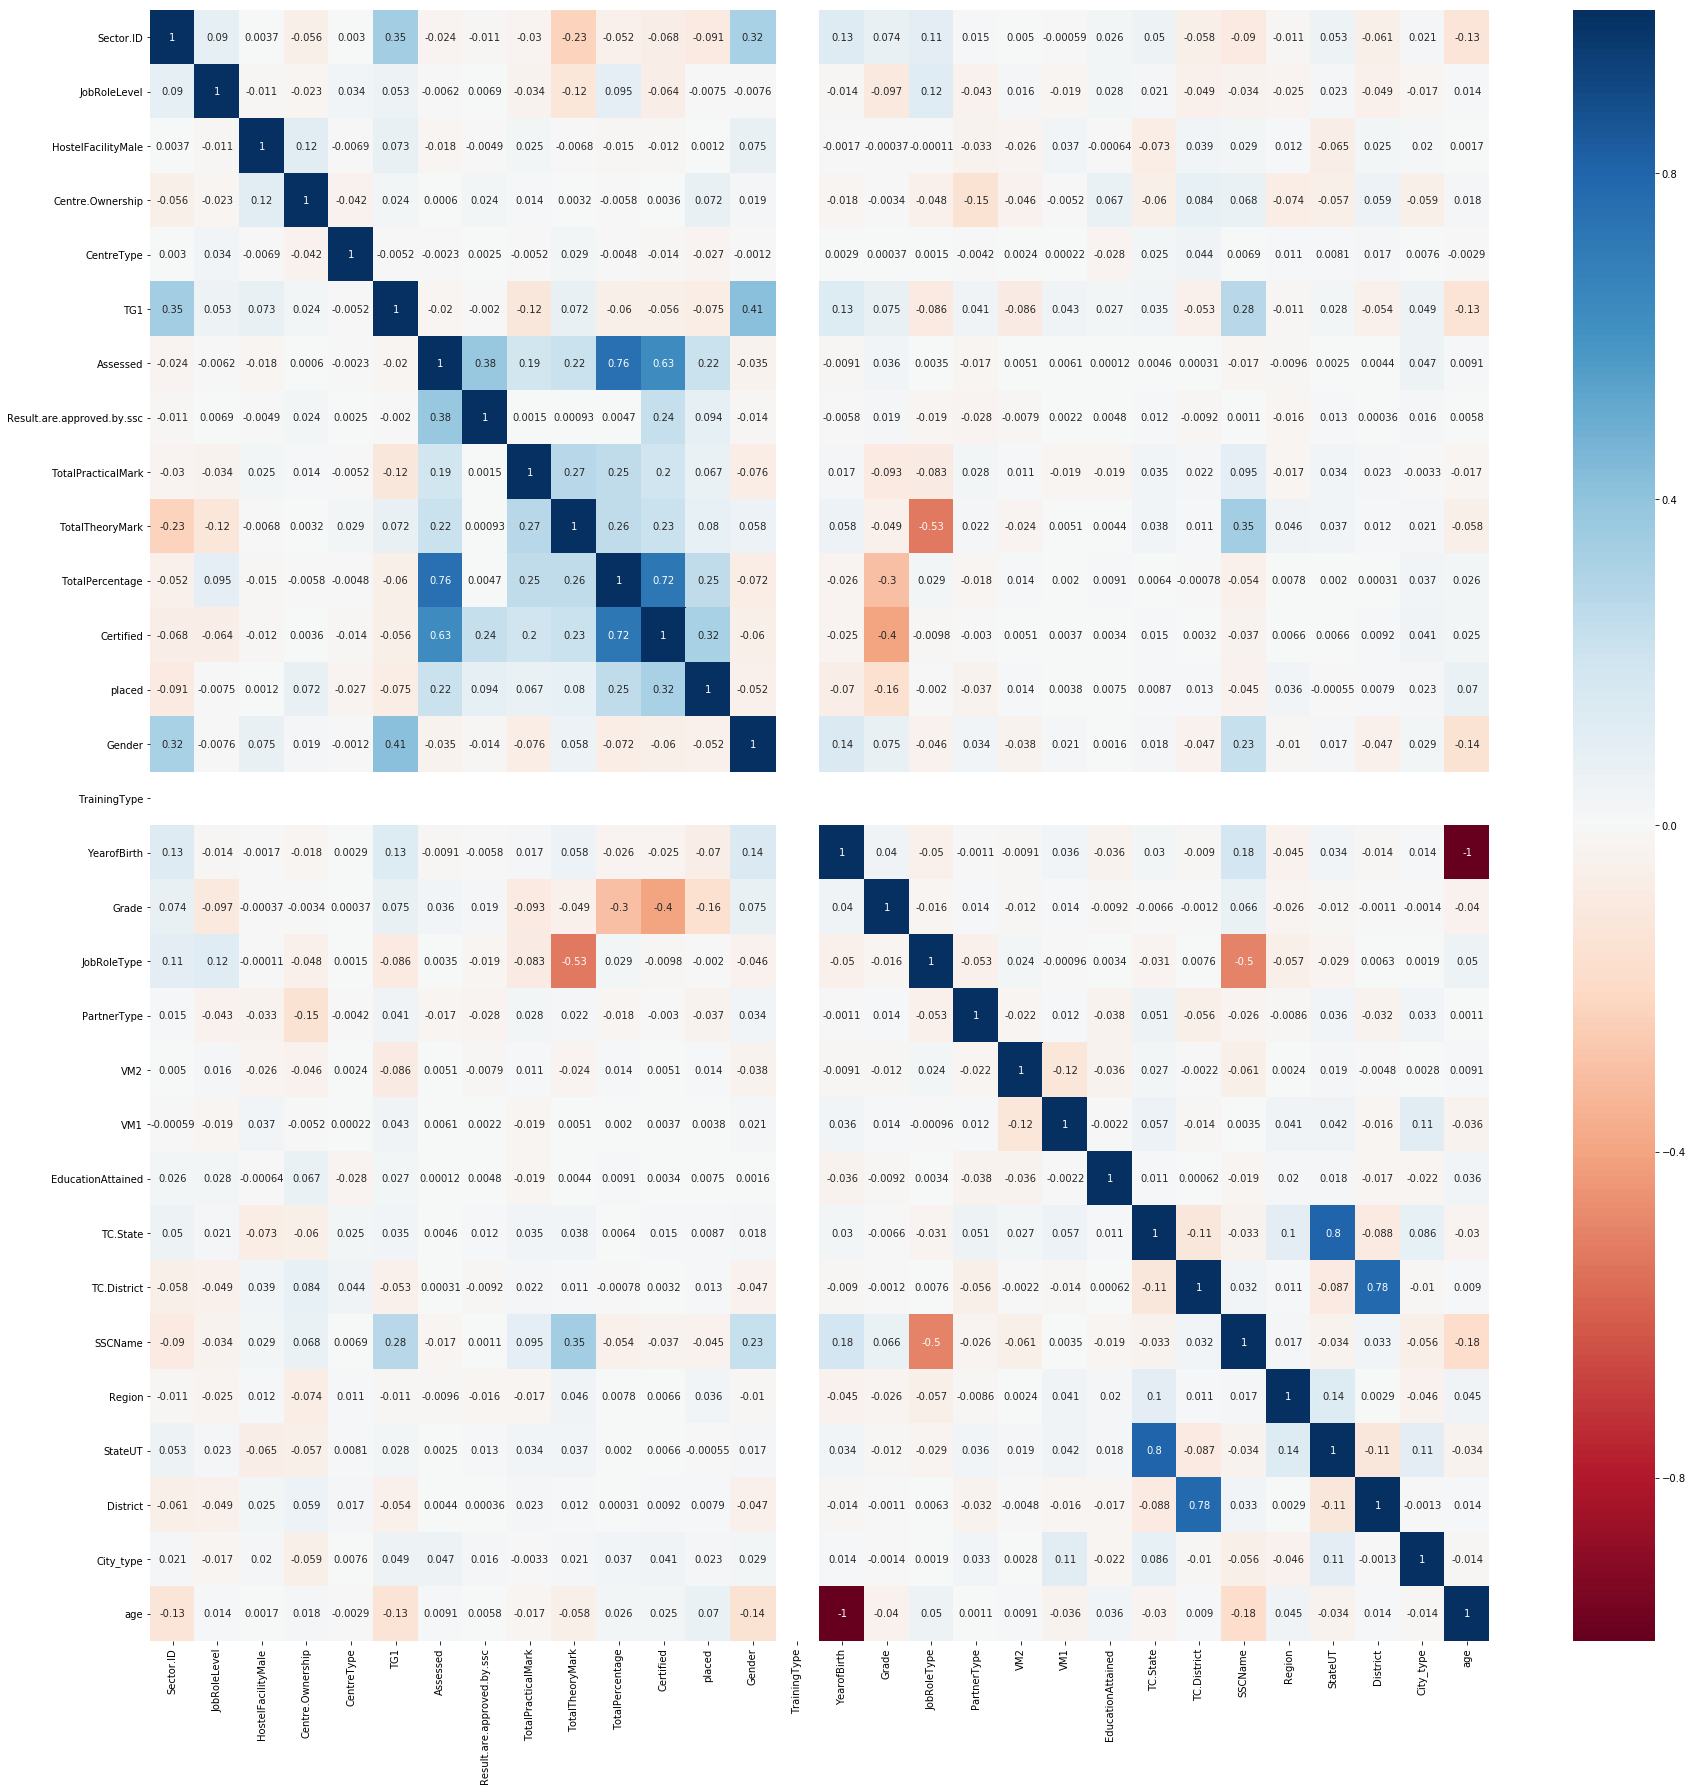

In [100]:
colormap=plt.cm.RdBu
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True,cmap=colormap)

In [103]:
data.columns

Index(['Sector.ID', 'JobRoleLevel', 'HostelFacilityMale', 'Centre.Ownership',
       'CentreType', 'TG1', 'Assessed', 'Result.are.approved.by.ssc',
       'TotalPracticalMark', 'TotalTheoryMark', 'TotalPercentage', 'Certified',
       'placed', 'Gender', 'TrainingType', 'YearofBirth', 'Grade',
       'JobRoleType', 'PartnerType', 'VM2', 'VM1', 'EducationAttained',
       'TC.State', 'TC.District', 'SSCName', 'Region', 'StateUT', 'District',
       'City_type', 'age'],
      dtype='object')

##### Tried to run the Y as 2=placed and 1=not placed but Logistic Regression is throwing an error. Need to mask it with 0 and 1

0=not placed(1)<br>
1=placed(2)

In [105]:
data['placed'][data['placed']==1]=0
data['placed'][data['placed']==2]=1

C:\Users\PRATIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\PRATIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Building Machine Learning Model

In [107]:
X=data.loc[:,data.columns !='placed']
Y=data.loc[:,data.columns=='placed']

### Logistic Regression

In [110]:
logit_model=sm.Logit(Y, X)

In [111]:
results=logit_model.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.604701
         Iterations 10
                                    Results: Logit
Model:                     Logit                   Pseudo R-squared:        0.110      
Dependent Variable:        placed                  AIC:                     117324.4242
Date:                      2019-04-29 07:44        BIC:                     117589.9229
No. Observations:          96964                   Log-Likelihood:          -58634.    
Df Model:                  27                      LL-Null:                 -65852.    
Df Residuals:              96936                   LLR p-value:             0.0000     
Converged:                 1.0000                  Scale:                   1.0000     
No. Iterations:            10.0000                                                     
---------------------------------------------------------------------------------------
                            Coef.    Std.Err.     z   

##### Observation
<br>
There are 9 variables which has p=value > 0.05. Hence we will remove those and rerun the models.

In [99]:
#X=data.loc[:,data.columns !='placed']
#Y=data.loc[:,data.columns=='placed']

In [100]:
data.columns

Index(['Sector.ID', 'JobRoleLevel', 'HostelFacilityMale', 'Centre.Ownership',
       'CentreType', 'TG1', 'Assessed', 'Result.are.approved.by.ssc',
       'TotalPracticalMark', 'TotalTheoryMark', 'TotalPercentage', 'Certified',
       'placed', 'Gender', 'TrainingType', 'YearofBirth', 'Grade',
       'JobRoleType', 'PartnerType', 'VM2', 'VM1', 'EducationAttained',
       'TC.State', 'TC.District', 'SSCName', 'Region', 'StateUT', 'District',
       'City_type', 'age'],
      dtype='object')

In [112]:
col1=['Sector.ID', 'JobRoleLevel', 'Centre.Ownership',
       'CentreType', 'TG1', 'Assessed', 'Result.are.approved.by.ssc','Certified',
       'placed', 'Gender', 'Grade',
       'JobRoleType', 'PartnerType', 'VM2','TC.State', 'TC.District', 'SSCName', 'Region', 'StateUT', 'District',
       'City_type']

In [113]:
X=data[col1].loc[:,data[col1].columns !='placed']
Y=data[col1].loc[:,data[col1].columns=='placed']

In [114]:
X.head()

,Sector.ID,JobRoleLevel,Centre.Ownership,CentreType,TG1,Assessed,Result.are.approved.by.ssc,Certified,Gender,Grade,JobRoleType,PartnerType,VM2,TC.State,TC.District,SSCName,Region,StateUT,District,City_type
0,52,2,2.0,1.0,1.0,2,2,2,1,2,2,2,3,23,198,2.0,6.0,23.0,198.0,2.0
1,52,2,2.0,1.0,1.0,2,2,1,1,4,2,3,3,9,149,2.0,3.0,9.0,149.0,3.0
2,52,2,2.0,1.0,1.0,2,2,2,1,2,2,3,6,9,149,2.0,3.0,9.0,149.0,3.0
3,52,2,2.0,1.0,1.0,2,2,2,1,1,2,3,6,9,149,2.0,3.0,9.0,149.0,3.0
4,52,2,2.0,1.0,1.0,2,2,2,1,2,2,3,3,9,149,2.0,3.0,9.0,149.0,3.0


### Spliting the data into Train and Test

In [115]:
X_Train, X_Test, Y_Train, Y_Test=train_test_split(X, Y, test_size=0.2, random_state=123)

#### Logistic Regression

In [116]:
logreg= LogisticRegression()
logreg.fit(X_Train, Y_Train)

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
Y_pred=logreg.predict(X_Train)

In [118]:
acc_score_Logistic=round(accuracy_score(Y_Train, Y_pred, normalize=True)*100, 2)

In [119]:
print(round(acc_score_Logistic, 2,), "%")

62.49 %


### Decision Tree

In [120]:
decision_Tree=tree.DecisionTreeClassifier()
decision_Tree.fit(X_Train, Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
Y_Pred=decision_Tree.predict(X_Train)
acc_score_decision_Tree=round(accuracy_score(Y_Train, Y_Pred)*100, 2)
print(round(acc_score_decision_Tree, 2,), "%")

87.97 %


### Random Forest

In [122]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_Train, Y_Train)

C:\Users\PRATIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
Y_prediction=random_forest.predict(X_Train)
acc_score_random_forest=round(accuracy_score(Y_Train,Y_prediction)*100, 2)
print(round(acc_score_random_forest, 2,), "%")

87.96 %


### KNN

In [124]:
knn=KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_Train, Y_Train)

C:\Users\PRATIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [125]:
Y_Pred=knn.predict(X_Train)
acc_score_knn=round(accuracy_score(Y_Train, Y_Pred)*100, 2)
print(round(acc_score_knn, 2,), "%")

79.97 %


### Gaussian Naive Bayes

In [126]:
gaussian= GaussianNB()
gaussian.fit(X_Train, Y_Train)

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [127]:
Y_Pred= gaussian.predict(X_Train)
acc_score_gaussian=round(gaussian.score(X_Train, Y_Train)*100, 2)
print(round(acc_score_gaussian,2,), "%")

57.17 %


### Perceptron

In [128]:
perceptron= Perceptron(max_iter=5)
perceptron.fit(X_Train, Y_Train)

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=5, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [129]:
Y_Pred= perceptron.predict(X_Train)
acc_score_perceptron=round(perceptron.score(X_Train, Y_Train)*100, 2)
print(round(acc_score_perceptron,2,), "%")

43.33 %


### Which is the best model?

In [130]:
results=pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gaussian Naive Baise', 'Perceptron'],
    'Score': [acc_score_Logistic, acc_score_decision_Tree, acc_score_random_forest, acc_score_knn, acc_score_gaussian, acc_score_perceptron]})

result_df= results.sort_values(by='Score', ascending=False)
result_df= result_df.set_index('Score')
result_df

,Model
Score,
87.97,Decision Tree
87.96,Random Forest
79.97,KNN
62.49,Logistic Regression
57.17,Gaussian Naive Baise
43.33,Perceptron


#### We can see Decision Tree and Random Forest are giving the best scores. We will use the Random Forest to further tune and predict the final outcome.

### K- fold cross validation

Rather than opting for the usual Train/Test 80:20 split, we will resort to K-Folds Cross Validation for splitting our data.

KFolds method splits our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

Therefore, this is an important step towards making our model as accurate as we can.

In [131]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(n_estimators=100)
scores=cross_val_score(rf, X_Train, Y_Train, cv=10, scoring="accuracy")

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

In [132]:
print("Scores:", scores)

Scores: [0.73743233 0.72712039 0.73443341 0.73198401 0.7237334  0.73224185
 0.73017919 0.73172618 0.73830089 0.73981434]


In [133]:
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Mean: 0.7326965999950692
Standard Deviation: 0.004763827571640942


## This looks like a more realistic model. Our Random forest model has an average accuracy of 73% with a standard deviation of 0.004%. This means the accuracy model of our model can differ +- 0.4%

<br>
<br>

### We will do hyperparameter tuning and Random Forest

In [134]:
importance= pd.DataFrame({'feature': X_Train.columns, 'importance': np.round(random_forest.feature_importances_,3)})
importance= importance.sort_values('importance', ascending= False).set_index('feature')

In [135]:
importance.head(16)

,importance
feature,
TC.District,0.150
District,0.142
Certified,0.089
Grade,0.077
TC.State,0.067
VM2,0.061
PartnerType,0.057
StateUT,0.055
SSCName,0.049


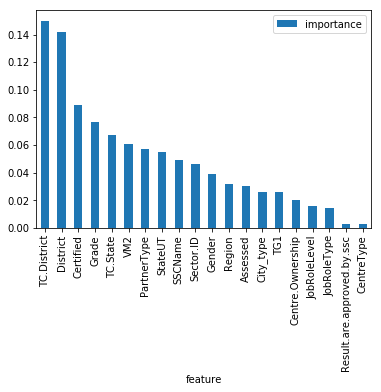

In [136]:
importance.plot.bar()

### Observation:
<br>
The last two features 'CentreType', 'Results.are.approved.by.ssc' does not play a significant role in our random forest classifier prediction process. We will drop them from the dataset and train the classifier again. We could also remove some more features but that need more investigation on how those affects our model. But for now the last 2 are good to be removed.
<br>
<br>
<br>

### Droping the 2 non-significant features

In [137]:
X_Train1=X_Train.drop("CentreType", axis=1)
X_Test1=X_Test.drop("CentreType", axis=1)

In [138]:
X_Train_new=X_Train1.drop("Result.are.approved.by.ssc", axis=1)
X_Test_new=X_Test1.drop("Result.are.approved.by.ssc", axis=1)

In [139]:
X_Train_new.shape

(77571, 18)

In [140]:
X_Test_new.shape

(19393, 18)

<br>
<br> 
<br>
Training Random Forest again

In [141]:
random_forest=RandomForestClassifier(n_estimators=100, oob_score= True)
random_forest.fit(X_Train_new, Y_Train)
Y_Prediction= random_forest.predict(X_Train_new)

C:\Users\PRATIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [142]:
random_forest.score(X_Train_new, Y_Train)
acc_random_forest= round(random_forest.score(X_Train_new, Y_Train)*100, 2)
print(round(acc_random_forest,2,), "%")

87.95 %


### Hyperparameter Tuning

In [143]:
param_grid=[{'max_depth':[2,4,6,10,12,16,20,None],
            'max_features':[1,4,8,12,16]}]

In [144]:
gs=GridSearchCV(estimator=RandomForestClassifier(random_state=100),param_grid=param_grid, cv=10)

In [145]:
gs.fit(X_Train_new, Y_Train)

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [2, 4, 6, 10, 12, 16, 20, None], 'max_features': [1, 4, 8, 12, 16]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [146]:
gs.cv_results_['params']

[{'max_depth': 2, 'max_features': 1},
 {'max_depth': 2, 'max_features': 4},
 {'max_depth': 2, 'max_features': 8},
 {'max_depth': 2, 'max_features': 12},
 {'max_depth': 2, 'max_features': 16},
 {'max_depth': 4, 'max_features': 1},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 8},
 {'max_depth': 4, 'max_features': 12},
 {'max_depth': 4, 'max_features': 16},
 {'max_depth': 6, 'max_features': 1},
 {'max_depth': 6, 'max_features': 4},
 {'max_depth': 6, 'max_features': 8},
 {'max_depth': 6, 'max_features': 12},
 {'max_depth': 6, 'max_features': 16},
 {'max_depth': 10, 'max_features': 1},
 {'max_depth': 10, 'max_features': 4},
 {'max_depth': 10, 'max_features': 8},
 {'max_depth': 10, 'max_features': 12},
 {'max_depth': 10, 'max_features': 16},
 {'max_depth': 12, 'max_features': 1},
 {'max_depth': 12, 'max_features': 4},
 {'max_depth': 12, 'max_features': 8},
 {'max_depth': 12, 'max_features': 12},
 {'max_depth': 12, 'max_features': 16},
 {'max_depth': 16, 'max_featur

In [147]:
gs.best_params_

{'max_depth': 20, 'max_features': 16}

In [148]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [149]:
new_pred=gs.predict(X_Train_new)

In [150]:
acc_score=round(accuracy_score(Y_Train, new_pred)*100, 2)

In [151]:
print(round(acc_score,2,), "%")

84.68 %


#### Classification Report

In [152]:
print(classification_report(Y_Train, new_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     45279
           1       0.80      0.84      0.82     32292

   micro avg       0.85      0.85      0.85     77571
   macro avg       0.84      0.85      0.84     77571
weighted avg       0.85      0.85      0.85     77571



#### Confusion Matrix

In [154]:
confusion_mat=confusion_matrix(Y_Train, new_pred)
conf_df=pd.DataFrame(confusion_mat, index=['Actual neg', 'Actual pos'], columns=['Predicted neg', 'Predicted pos'])

In [155]:
conf_df

,Predicted neg,Predicted pos
Actual neg,38422,6857
Actual pos,5027,27265


Text(33,0.5,'Actual label')

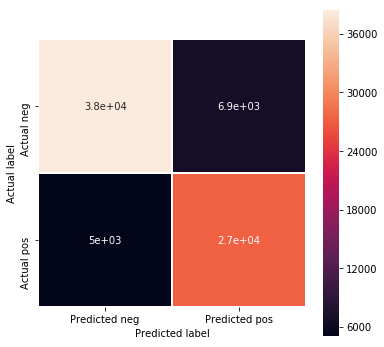

In [163]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_df,annot=True,square=True, linewidths=0.5)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

### Training the Test dataset using max depth:20 and max features :16 as found earlier

In [164]:
best_param_grid=[{
    'max_depth': [20],
    'max_features': [16]
}]

In [165]:
final_gs=GridSearchCV(estimator=RandomForestClassifier(random_state=100),param_grid=best_param_grid,cv=10)

In [166]:
final_gs.fit(X_Train_new, Y_Train)

C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRATIK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [20], 'max_features': [16]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [168]:
final_pred=final_gs.predict(X_Test_new)

In [171]:
Acc_score_Test=round(accuracy_score(Y_Test, final_pred)*100, 2)

In [173]:
print(round(Acc_score_Test,2,),'%')

74.47 %


In [174]:
accuracy_score(Y_Test,final_pred,normalize=False)

14442

### Classsification Report

In [175]:
print(classification_report(Y_Test,final_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     11300
           1       0.69      0.72      0.70      8093

   micro avg       0.74      0.74      0.74     19393
   macro avg       0.74      0.74      0.74     19393
weighted avg       0.75      0.74      0.75     19393



### Confusion Matrix_Final_Test_data

In [176]:
conf_mat_test=confusion_matrix(Y_Test, final_pred)
conff_df=pd.DataFrame(conf_mat_test,index=['Actual neg', 'Actual pos'], columns=['Predicted neg', 'Predicted pos' ])

In [177]:
conff_df

,Predicted neg,Predicted pos
Actual neg,8655,2645
Actual pos,2306,5787


Text(33,0.5,'Actual label')

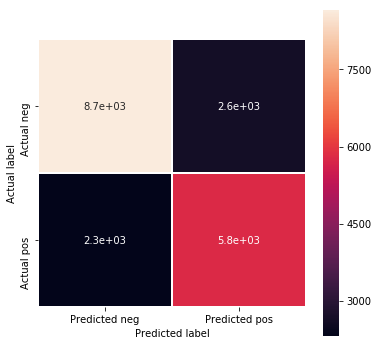

In [178]:
plt.figure(figsize=(6,6))
sns.heatmap(conff_df,annot=True,square=True,linewidths=0.5)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

### The model on Test data is 74% accurate with 5251 wrong predictions.
<br>
<br>


## ROC Curve

In [179]:
auc=roc_auc_score(Y_Test, final_pred)

In [180]:
fpr,tpr,threshold=roc_curve(Y_Test, final_pred)

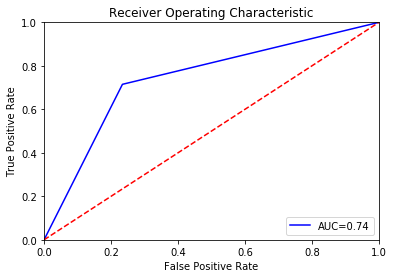

In [181]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [183]:
data.to_csv('cleaned_data.csv', index=False)